### 사전준비

In [76]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn으로 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 패션MNIST 데이터

데이터로드

In [78]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [79]:
(train_input, train_target),(test_input, test_target) = load_data()

#### 정규화

In [80]:
(train_input, train_target), (test_input, test_target) = load_data()

In [81]:
train_scaled = train_input / 255.0      # 0~1 실수값 변경

In [82]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [83]:
train_input.shape

(60000, 28, 28)

In [84]:
train_scaled.shape

(48000, 28, 28)

In [85]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


#### 모델생성 함수

In [86]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='ReLU_fashionMNIST_Deep_Model')
    model.add(keras.layers.Flatten(input_shape=(28,28)))    # 2차원 입력값을 1차원으로
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))

    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [87]:
# 함수 사용 예시
model = model_fn(keras.layers.Dense(100, activation='relu', name='hidden2'))
model.summary()

Model: "ReLU_fashionMNIST_Deep_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.summary()

Model: "ReLU_fashionMNIST_Deep_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### 손실곡선, 정확도

In [89]:
model = model_fn()
model.summary()

Model: "ReLU_fashionMNIST_Deep_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 2s - loss: 0.5314 - accuracy: 0.8120 - 2s/epoch - 1ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.3917 - accuracy: 0.8592 - 2s/epoch - 1ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3553 - accuracy: 0.8725 - 2s/epoch - 1ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3333 - accuracy: 0.8806 - 2s/epoch - 1ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3213 - accuracy: 0.8849 - 2s/epoch - 1ms/step


In [91]:
history.history

{'loss': [0.5313685536384583,
  0.39169615507125854,
  0.35532984137535095,
  0.333336740732193,
  0.3212662637233734],
 'accuracy': [0.8120208382606506,
  0.8591874837875366,
  0.8725208044052124,
  0.8806041479110718,
  0.8848958611488342]}

#### 손실곡선 차트

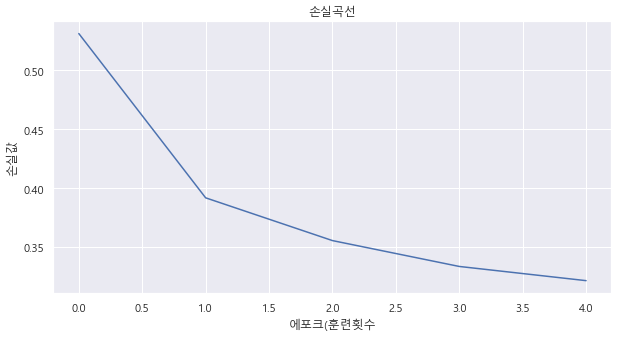

In [92]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수')
plt.ylabel('손실값')
plt.show()


#### 정확도 차트

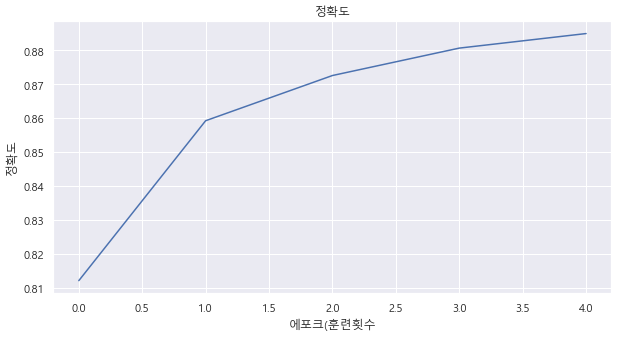

In [93]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('정확도')
plt.xlabel('에포크(훈련횟수')
plt.ylabel('정확도')
plt.show()

#### 에포크 20번 훈련

In [94]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)


Epoch 1/20
1500/1500 [==============================] - 3s 1ms/step - loss: 0.5286 - accuracy: 0.8132
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3937 - accuracy: 0.8593
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3548 - accuracy: 0.8722
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3334 - accuracy: 0.8811
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3196 - accuracy: 0.8865
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3060 - accuracy: 0.8914
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.8946
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2877 - accuracy: 0.8978
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2824 - accuracy: 0.9001
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.275

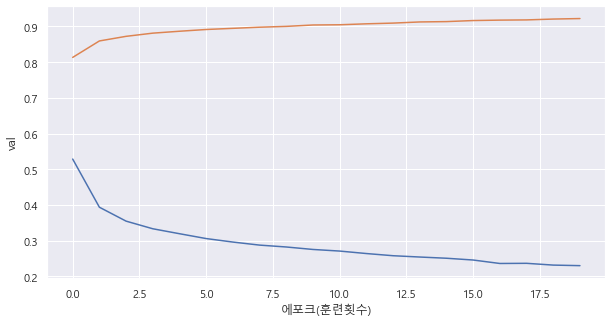

In [95]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
# plt.title('정확도')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('val')
plt.show()

#### 검증손실

훈련세트 훈련 -> 정확도 92%

In [96]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))


Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5301 - accuracy: 0.8121 - val_loss: 0.4266 - val_accuracy: 0.8445
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3894 - accuracy: 0.8596 - val_loss: 0.4336 - val_accuracy: 0.8405
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3533 - accuracy: 0.8722 - val_loss: 0.3978 - val_accuracy: 0.8622
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3308 - accuracy: 0.8824 - val_loss: 0.3553 - val_accuracy: 0.8779
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3174 - accuracy: 0.8859 - val_loss: 0.3769 - val_accuracy: 0.8730
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3050 - accuracy: 0.8911 - val_loss: 0.3633 - val_accuracy: 0.8770
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2967 - accuracy: 0.8940 - val_loss: 0.3599 - val_accuracy:

In [97]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련세트/검증세트 비교

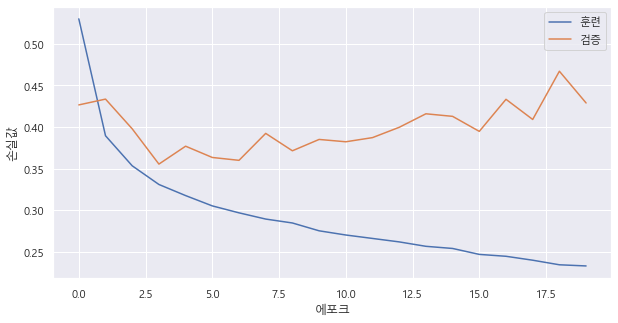

In [98]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

#### 드롭아웃

In [99]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "ReLU_fashionMNIST_Deep_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5900 - accuracy: 0.7920 - val_loss: 0.4365 - val_accuracy: 0.8462
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4490 - accuracy: 0.8400 - val_loss: 0.4041 - val_accuracy: 0.8587
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4221 - accuracy: 0.8534 - val_loss: 0.3807 - val_accuracy: 0.8668
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4084 - accuracy: 0.8583 - val_loss: 0.3922 - val_accuracy: 0.8611
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3991 - accuracy: 0.8638 - val_loss: 0.3825 - val_accuracy: 0.8748
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3932 - accuracy: 0.8647 - val_loss: 0.3809 - val_accuracy: 0.8730
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3900 - accuracy: 0.8687 - val_loss: 0.4051 - val_accuracy:

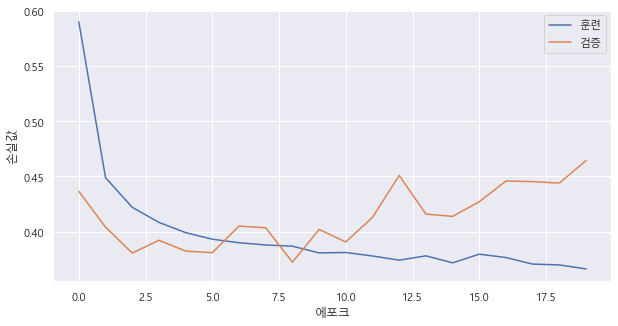

In [101]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [102]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3632 - accuracy: 0.8758 - val_loss: 0.4039 - val_accuracy: 0.8723
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3507 - accuracy: 0.8762 - val_loss: 0.4115 - val_accuracy: 0.8685
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3332 - accuracy: 0.8795 - val_loss: 0.3765 - val_accuracy: 0.8809
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3239 - accuracy: 0.8815 - val_loss: 0.3977 - val_accuracy: 0.8699
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3162 - accuracy: 0.8825 - val_loss: 0.3775 - val_accuracy: 0.8773
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3126 - accuracy: 0.8848 - val_loss: 0.3631 - val_accuracy: 0.8802
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3084 - accuracy: 0.8861 - val_loss: 0.3600 - val_accuracy:

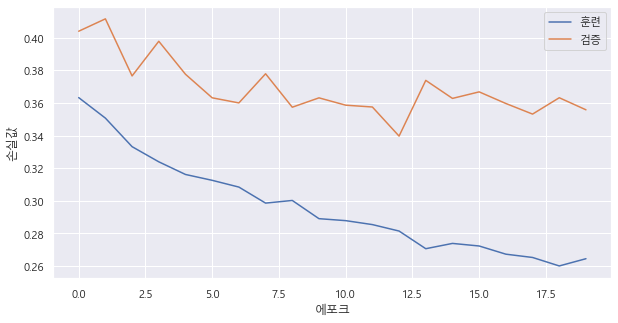

In [103]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [104]:
model.summary()

Model: "ReLU_fashionMNIST_Deep_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [105]:
# 훈련된 가중치만 저장
model.save_weights('./data/model-weights.h5')

In [106]:
# 훈련된 전체데이터 저장
model.save('./data/model.h5')

#### 가중치 모델 로드

In [107]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model-weights.h5')

In [108]:
# 가중치만 불러와서 오류가 뜸
model.evaluate(val_scaled, val_target)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

#### 전체모델 로드

In [109]:
model = keras.models.load_model('./data/model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3558 - accuracy: 0.8850


[0.35576286911964417, 0.8849999904632568]

가중치만 저장하면 모델 기능 제약있음. 모델 전체 데이터저장하면 모든 기능 수행

In [110]:
model.predict(val_scaled)

375/375 [==============================] - 0s 890us/step


array([[1.44054837e-24, 0.00000000e+00, 8.29035447e-31, ...,
        8.44020269e-24, 1.00000000e+00, 6.07941052e-32],
       [6.79944738e-19, 0.00000000e+00, 3.23147463e-24, ...,
        1.06470346e-19, 1.00000000e+00, 9.99535972e-21],
       [9.23722672e-23, 4.54968926e-22, 1.98186486e-30, ...,
        9.99948621e-01, 2.30017557e-14, 9.78935960e-11],
       ...,
       [5.08943744e-14, 0.00000000e+00, 1.64486080e-19, ...,
        9.52751765e-16, 1.00000000e+00, 1.29335710e-13],
       [6.06687679e-17, 0.00000000e+00, 1.29825916e-23, ...,
        1.12696533e-25, 1.00000000e+00, 2.40210905e-29],
       [1.82438657e-01, 7.58769659e-07, 1.04184188e-02, ...,
        2.22440558e-05, 9.85317092e-06, 5.14762938e-01]], dtype=float32)

In [111]:
### 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 841us/step


0.885

In [112]:
val_labels

array([8, 8, 7, ..., 8, 8, 9], dtype=int64)

#### 콜백 Callback

In [115]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5797 - accuracy: 0.7957 - val_loss: 0.4146 - val_accuracy: 0.8476
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4334 - accuracy: 0.8450 - val_loss: 0.3791 - val_accuracy: 0.8643
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3998 - accuracy: 0.8550 - val_loss: 0.3549 - val_accuracy: 0.8712
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3803 - accuracy: 0.8621 - val_loss: 0.3593 - val_accuracy: 0.8692
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3648 - accuracy: 0.8663 - val_loss: 0.3544 - val_accuracy: 0.8708
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3536 - accuracy: 0.8693 - val_loss: 0.3362 - val_accuracy: 0.8803
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3419 - accuracy: 0.8739 - val_loss: 0.3368 - val_accuracy:

In [116]:
# 체크포인트 확인
# 위 콜백함수에서 제일 마지막 에포크 값이 나옴
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8808


[0.32885438203811646, 0.8808333277702332]

#### 조기종료

In [133]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

# 베스트 모델을 저장할 콜백
# save_best_only=True : 가장 좋은 모델 저장됨!!!! 필수!!!!
# verbose=1 : 내용을 출력하기 때문에 각 에포크마다 무슨 값 나오는지 확인가능
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model2.h5', save_best_only=True, verbose=1)

# patience : 몇 번 참을래?
# restore_best_weights=True : 만약 2번 참았는데 그 전값이 더 최소값이면 그 값으로 돌아가!
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1474/1500 [============================>.] - ETA: 0s - loss: 0.5977 - accuracy: 0.7886
Epoch 1: val_loss improved from inf to 0.44757, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5957 - accuracy: 0.7893 - val_loss: 0.4476 - val_accuracy: 0.8392
Epoch 2/20
1483/1500 [============================>.] - ETA: 0s - loss: 0.4438 - accuracy: 0.8404
Epoch 2: val_loss improved from 0.44757 to 0.38961, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4436 - accuracy: 0.8405 - val_loss: 0.3896 - val_accuracy: 0.8580
Epoch 3/20
1487/1500 [============================>.] - ETA: 0s - loss: 0.4077 - accuracy: 0.8522
Epoch 3: val_loss improved from 0.38961 to 0.37582, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4074 - accuracy: 0.8521 - val_loss: 0.3758 - val_accuracy: 0.8610
Epoch 4/20
1491/1500 [===================

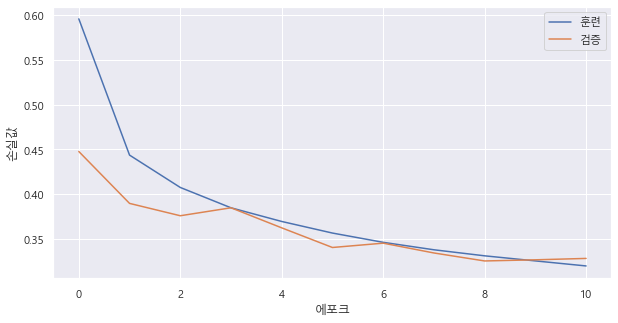

In [134]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [137]:
# 어느 에포크에서 조기종료했는지 확인
early_stopping_cb.stopped_epoch     # 10번째에서 멈춤(드랍아웃)

10

In [138]:
model.evaluate(val_scaled, val_target)      # 5번째 에포크값

375/375 [==============================] - 0s 1ms/step - loss: 0.3253 - accuracy: 0.8808


[0.32532307505607605, 0.8807500004768372]

### 조기종료된 모델 저장값 / 체크포인트로 저장된 모델 저장값 비교

In [139]:
model_cp = keras.models.load_model('./data/best_model2.h5')
model_cp.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3253 - accuracy: 0.8808


[0.32532307505607605, 0.8807500004768372]

In [141]:
### 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 1ms/step


0.88075

In [144]:
### 예측결과
val_labels[:10]

array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=int64)